In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 



Content
Since a few months, i write down the data of my car's display after each ride; while regularly changing the gas type.

In the file, you will find the displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature i had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it… and yes - the gas type i was using. I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as i was doing my own project on it already.

In [2]:
data=pd.read_csv('/Users/lucaalfano/IH-CW/data-analytics-challenge/data/measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


# First look 

In [3]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [4]:
data['distance'] = data['distance'].str.replace(',','.').astype('float32')
data['consume'] = data['consume'].str.replace(',','.').astype('float32')
data['temp_inside'] = data['temp_inside'].str.replace(',','.').astype('float32')
data['refill liters'] = data['refill liters'].str.replace(',','.').astype('float32')

# Visualising

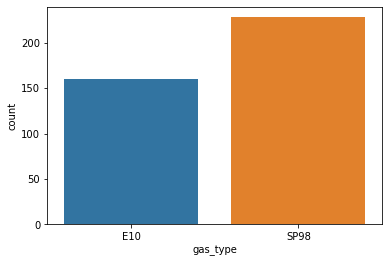

In [6]:
sns.countplot(data = data, x = "gas_type")
plt.show()

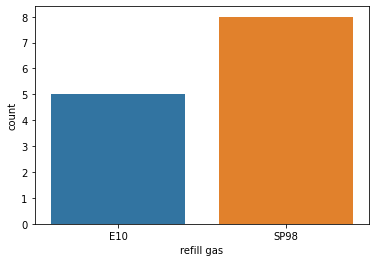

In [7]:
sns.countplot(data = data, x = "refill gas")
plt.show()

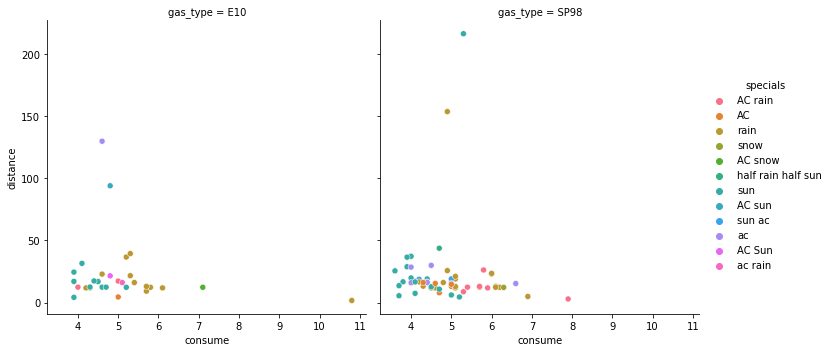

In [8]:
sns.relplot(data = data, x = "consume", y = "distance", hue = "specials", col = "gas_type", kind = "scatter")
plt.show()

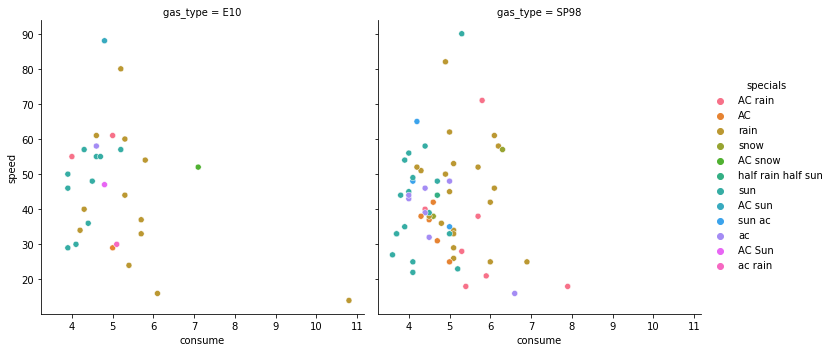

In [9]:
sns.relplot(data = data, x = "consume", y = "speed", hue = "specials", col = "gas_type", kind = "scatter")
plt.show()

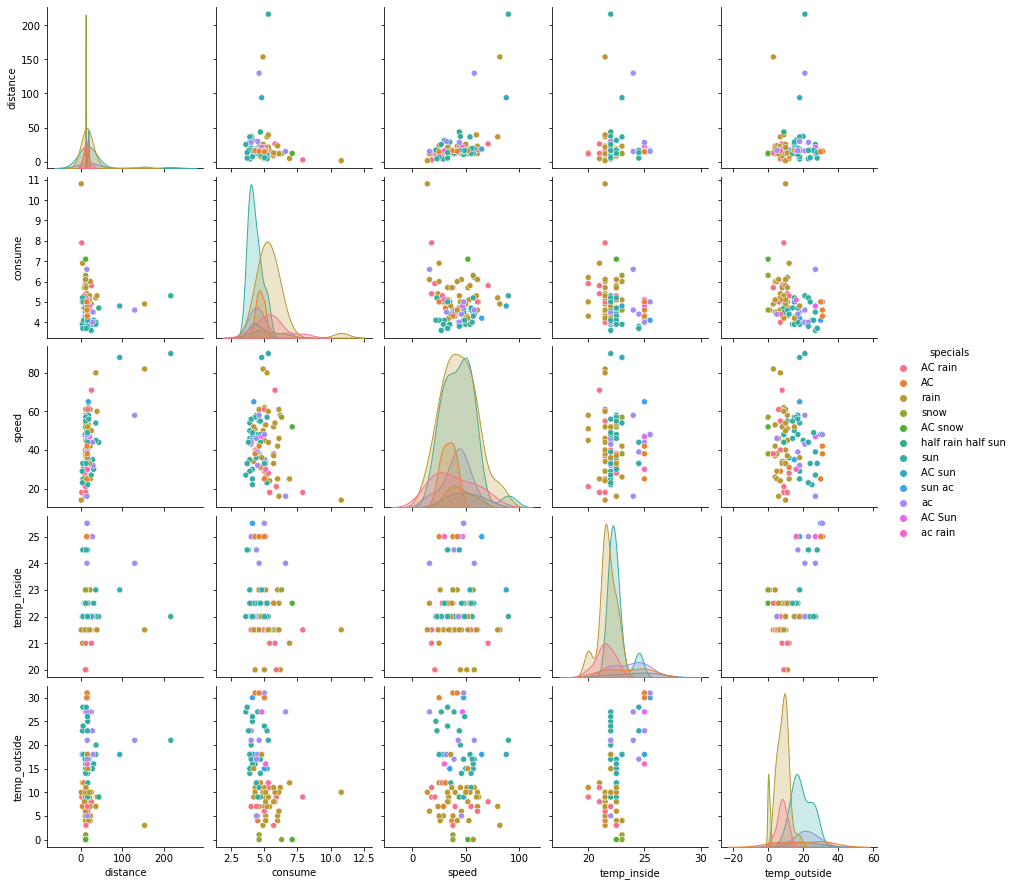

In [10]:
sns.pairplot(data = data[["distance", "consume", "speed", "temp_inside", "temp_outside", "specials"]], hue="specials")
plt.show()

# Cleaning

In [5]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [11]:
# temp inisde with the mean as there isnt many nans
# specials with none as assume none mentioned means off 
# refill liters and gas are essentially 0 as the car was not refill that journey

In [12]:
data['temp_inside'] = data['temp_inside'].fillna(data['temp_inside'].mean())
data['specials'] = data['specials'].fillna('none')
data['refill liters'] = data['refill liters'].fillna(0)
data['refill gas'] = data['refill gas'].fillna('norefill')

In [13]:
data.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [14]:
data.groupby(by='gas_type').sum()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
gas_type,,,,,,,,,
E10,3375.399902,789.0,6961,3506.788574,1619,7,16,12,198.0
SP98,4249.899902,1117.0,9307,5001.865723,2788,23,32,20,284.5


In [15]:
3375.4/789

4.2780735107731305

In [16]:
4249.9/1117

3.8047448522829

in the journeys taken, theres a 0.4 L/100km difference between fuels 
lower the L/100km the better
SP98 travels more miles and uses less gas, even while driving in warmer months, with more AC/sun/rain etc changing conditions 

In [17]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,none,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,none,E10,0,0,0,0.0,norefill
2,11.2,5.5,38,21.5,15,none,E10,0,0,0,0.0,norefill
3,12.9,3.9,36,21.5,14,none,E10,0,0,0,0.0,norefill
4,18.5,4.5,46,21.5,15,none,E10,0,0,0,0.0,norefill
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,none,SP98,0,0,0,0.0,norefill
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,0.0,norefill
385,16.0,3.8,45,25.0,19,none,SP98,0,0,0,0.0,norefill
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,0.0,norefill


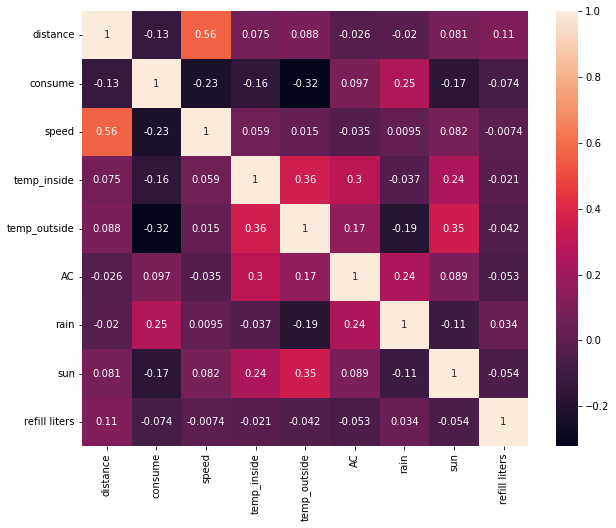

In [18]:

fig, ax=plt.subplots(figsize=(10,8))
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [20]:
features = ["specials", "gas_type", "refill gas"]

df_dummies = pd.get_dummies(data[features])
data = pd.concat([data,df_dummies], axis = 1)
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,...,specials_none,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_norefill
0,28.0,5.0,26,21.5,12,none,E10,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,12.0,4.2,30,21.5,13,none,E10,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,11.2,5.5,38,21.5,15,none,E10,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,12.9,3.9,36,21.5,14,none,E10,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,18.5,4.5,46,21.5,15,none,E10,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,none,SP98,0,0,0,...,1,0,0,0,0,0,1,0,0,1
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,...,0,0,0,0,0,0,1,0,0,1
385,16.0,3.8,45,25.0,19,none,SP98,0,0,0,...,1,0,0,0,0,0,1,0,0,1
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [21]:
data = data.drop(features + ['gas_type_SP98'], axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_half rain half sun,specials_none,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_E10,refill gas_E10,refill gas_SP98,refill gas_norefill
0,28.0,5.0,26,21.5,12,0,0,0,45.0,0,...,0,1,0,0,0,0,1,1,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,0,...,0,1,0,0,0,0,1,0,0,1
2,11.2,5.5,38,21.5,15,0,0,0,0.0,0,...,0,1,0,0,0,0,1,0,0,1
3,12.9,3.9,36,21.5,14,0,0,0,0.0,0,...,0,1,0,0,0,0,1,0,0,1
4,18.5,4.5,46,21.5,15,0,0,0,0.0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0.0,0,...,0,1,0,0,0,0,0,0,0,1
384,16.1,4.3,38,25.0,31,1,0,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
385,16.0,3.8,45,25.0,19,0,0,0,0.0,0,...,0,1,0,0,0,0,0,0,0,1
386,15.4,4.6,42,25.0,31,1,0,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


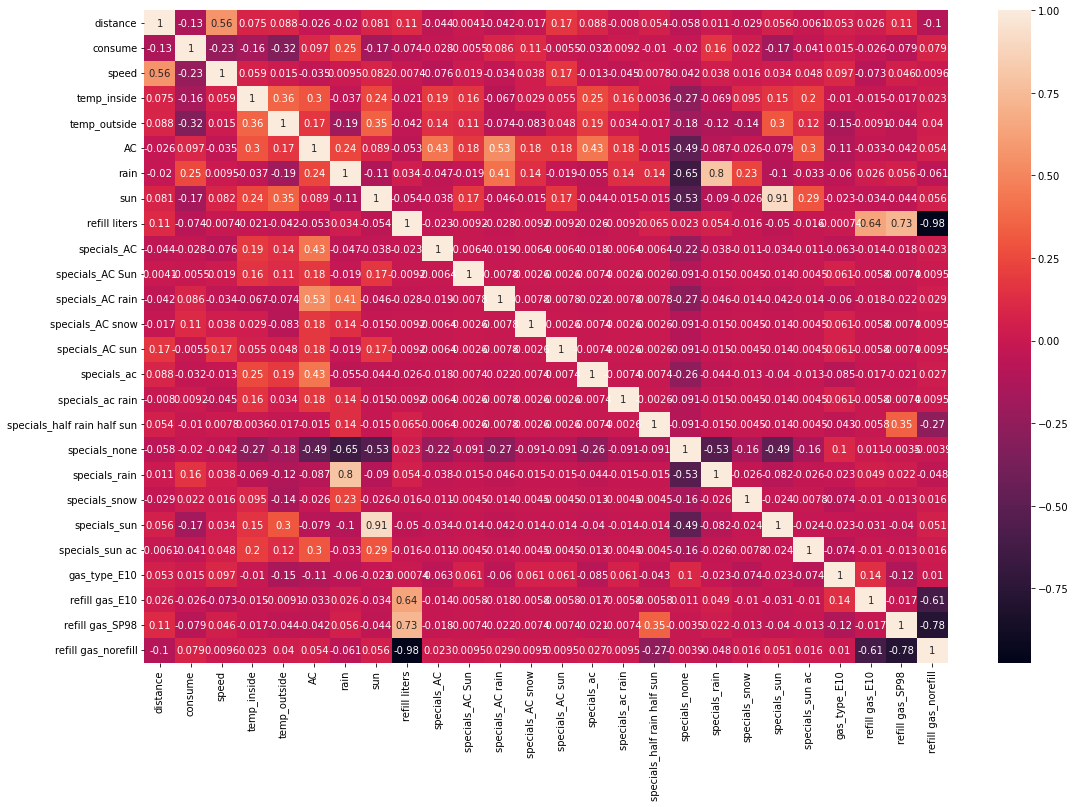

In [23]:
fig, ax=plt.subplots(figsize=(18,12))
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [53]:
corr_index = data.corr()['consume'].abs().sort_values(ascending=False)[1:11].index
print(corr_index)


Index(['temp_outside', 'rain', 'speed', 'sun', 'specials_sun', 'temp_inside',
       'specials_rain', 'distance', 'specials_AC snow', 'AC'],
      dtype='object')


# Modelling

In [26]:
X = data.drop(['consume'], axis = 1)
y = data['consume']

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X,y)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(310, 25) (78, 25) (310,) (78,)


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

max_depth_choices= [3,10,None]
criterion_choices = ['squared_error','absolute_error']
min_samples_split_choices = [2,10]
min_samples_leaf_choices = [2,10]        

In [31]:
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [32]:
model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 10, None],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [34]:
grid_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [35]:
grid_search.best_score_

0.4787606636327945

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
max_depth_choices= [3,4,5,6,7,8,9,10,None]
criterion_choices = ['squared_error','absolute_error']
min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
max_features_choices = [2,3,4,5,6]



random_grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [47]:
%%time
model = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=100, cv = 5, n_jobs = 10)

CPU times: user 58 µs, sys: 309 µs, total: 367 µs
Wall time: 793 µs


In [48]:
%%time
random_search.fit(X_train,y_train)

CPU times: user 257 ms, sys: 126 ms, total: 383 ms
Wall time: 4.34 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=10,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      None],
                                        'max_features': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]})

In [49]:
random_search.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 6,
 'max_depth': None,
 'criterion': 'squared_error'}

In [50]:
random_search.best_score_

0.4510653337661631

In [51]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


regr = RandomForestRegressor(max_depth=5,
                             min_samples_split=20, 
                             min_samples_leaf =20, 
                             max_samples=0.8, 
                             random_state = 42)



cross_val_scores = cross_val_score(regr, X_train, y_train, cv=10)

CPU times: user 1.3 s, sys: 103 ms, total: 1.4 s
Wall time: 1.96 s


In [52]:
cross_val_scores

array([0.14292327, 0.49832512, 0.4881138 , 0.27210159, 0.35249745,
       0.21577484, 0.42913647, 0.44696509, 0.30122658, 0.38588086])

# Answer


fuel SP98 does not seem to use more fuel than E10, given the data provided SP98 seems like a better choice.

The most contributing factor to fuel use from my investigations, is outside tempurature, but this is likely caused due to the original user changing fuel types in certain seasons ('I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring.').

